In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
import numpy as np

In [2]:
X = pd.read_csv('appl_data.csv')
behave_on_site = pd.read_csv('behav_on_site.csv')
response = pd.read_csv('is_default.csv')
X.head()

,appl_id,app_crtime,client_id,birth,gender,pass_bdate,fam_status,quantity_child,max_age_child,property,...,region_reg,jobsworksince,work_experience,empl_state,empl_type,empl_worker_count,education_area,education,monthlyincome,monthlycost
0,1157589,2017-12-31T09:35:53Z,119804,1994-01-12,1,2010-10-08,4,1,3.0,5,...,10,NaN,3,4,NaN,NaN,7.0,2,15000.0,10000.0
1,1159012,2017-12-31T20:05:37Z,120147,1994-02-14,2,2010-04-06,4,0,0.0,5,...,11,2013-05-01,4,1,6.0,1.0,NaN,6,8000.0,6000.0
2,1157375,2017-12-31T08:18:56Z,119755,1984-10-20,2,2013-06-28,3,1,2.0,5,...,7,2015-12-01,10,1,10.0,6.0,6.0,7,15000.0,14000.0
3,1158541,2017-12-31T15:18:23Z,120042,1986-02-07,2,2012-09-27,4,0,0.0,5,...,10,2017-09-01,13,1,1.0,5.0,6.0,2,10000.0,5000.0
4,1157949,2017-12-31T11:25:38Z,119893,1992-06-26,2,2012-02-11,4,0,0.0,1,...,22,2014-08-01,3,1,10.0,5.0,3.0,1,7500.0,5000.0


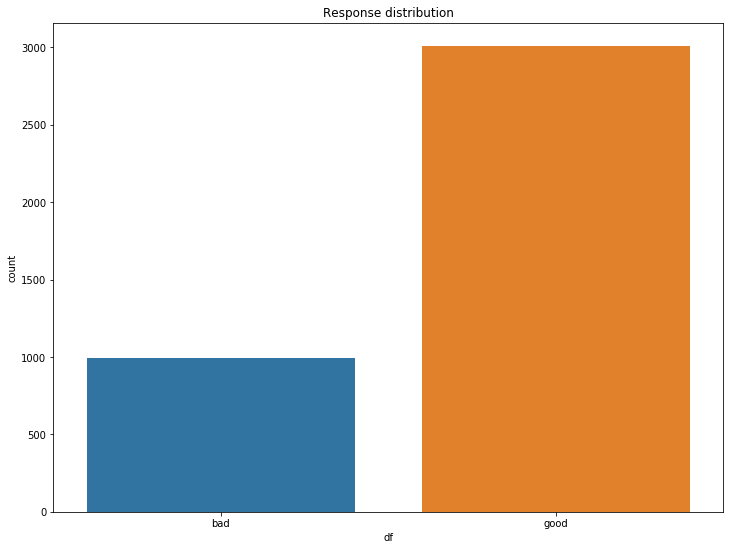

In [3]:
plt.figure(figsize = (12,9))
plt.title('Response distribution')
data = pd.merge(left = X, right = response, how='left', on='appl_id')
sns.countplot(data.df)
plt.show()

# Separate labeled data

In [4]:
train = data[data.df.notnull()]
test = data[data.df.isnull()].drop('df',axis = 1)
print train.shape
print test.shape

(4002, 24)
(4082, 23)


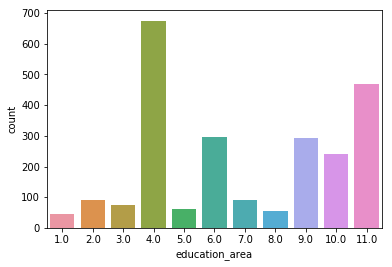

In [7]:
sns.countplot(train.education_area)

# Missing values


In [5]:
drops = ['appl_id','client_id','max_age_child', 'education_area', 'empl_type', 'empl_worker_count','jobsworksince']
x = train.drop(drops, axis = 1)
train.drop(drops, axis = 1).isna().sum() / train.shape[0]

app_crtime                 0.0
birth                      0.0
gender                     0.0
pass_bdate                 0.0
fam_status                 0.0
quantity_child             0.0
property                   0.0
lived_since                0.0
is_same_reg_lived_since    0.0
region                     0.0
region_reg                 0.0
work_experience            0.0
empl_state                 0.0
education                  0.0
monthlyincome              0.0
monthlycost                0.0
df                         0.0
dtype: float64

# Datetimes

In [ ]:
dates = ['app_crtime', 'birth', 'pass_bdate', 'lived_since', 'is_same_reg_lived_since']
x[dates] = x[dates].apply(pd.to_datetime)

x['age'] = (x.app_crtime - x.birth).dt.days 

x['lived_since_days'] = (x.app_crtime - x.lived_since).dt.days 

x['reg_place_delta'] = (x.lived_since - x.is_same_reg_lived_since).dt.days

plt.figure(figsize = (12,9))
plt.title("Applicants age distribution")
sns.distplot(x.age, bins=20)
plt.show()


plt.figure(figsize = (12,9))
plt.title("Application hourly distribution")
sns.countplot(x.app_crtime.dt.hour.values, color = 'lightblue')
plt.show()

In [ ]:
categoricals = ['gender','region','region_reg', 'fam_status', 'empl_state']

ordinals = ['property','education']

numericals = ['quantity_child','work_experience','monthlyincome','monthlycost',
              'age','lived_since_days','reg_place_delta']

In [ ]:
c = pd.get_dummies(x[categoricals].astype('object')).reset_index(drop = True)
a = x[ordinals].reset_index(drop = True)

scaler = StandardScaler()
scaler.fit(x[numericals])

b = scaler.transform(x[numericals])
b = pd.DataFrame(b, columns = numericals)

b.head()

In [ ]:
train_df = pd.concat((a,b,c), axis = 1)

In [ ]:
lr = LogisticRegressionCV(Cs=[np.logsp])
X,Y = train_df, x.df

In [ ]:
lr.fit(X,Y)

In [ ]:
y_fitted = lr.predict(train_df)
print classification_report(Y,y_fitted)